In [ ]:
!pip install nglview==1.0
!pip install py3Dmol
!pip install --upgrade threadpoolctl

In [ ]:
!pip install -e .

In [1]:
cd test\data

C:\Users\vulla\Documents\barnaba\barnaba_research\test\data


In [2]:
pwd
#this is working directory

'C:\\Users\\vulla\\Documents\\barnaba\\barnaba_research\\test\\data'

# 1. Calculate eRMSD [1]

In [14]:
import barnaba as bb
native="sample1.pdb"
traj = "samples.xtc"
top = "sample1.pdb"
ermsd = bb.ermsd(native,traj,topology=top)

# Loaded reference sample1.pdb 
# Loaded target samples.xtc 


# 2. Calculate RMSD after optimal alignment

In [15]:
# calculate RMSD
rmsd = bb.rmsd(native,traj,topology=top,heavy_atom=False)

# found  709 atoms in common


# 3. Search for single/double stranded RNA motifs in the PDB database or in simulations [1]

### Single

In [18]:
query = "GNRA.pdb" 
target = "1S72.pdb" 

# call function. 
results_single = bb.ss_motif(query,target,threshold=0.6,out='gnra_loops',bulges=1)

# Loaded query GNRA.pdb 
# Loaded target 1S72.pdb 
# Treating nucleotide 1MA628 as A 
# Treating nucleotide OMU2587 as U 
# Treating nucleotide OMG2588 as G 
# Treating nucleotide UR32619 as U 
# Treating nucleotide PSU2621 as U 


### Double

In [17]:
# find all SARCIN motifs in H.Marismortui large ribosomal subunit (PDB 1S72)
query = "SARCIN.pdb" 
pdb = "1S72.pdb" 

# call function. 
results_double = bb.ds_motif(query,pdb,l1=8,l2=7,bulges=0,threshold=0.7,out='sarcin_motif')

# Loaded query SARCIN.pdb 
# Loaded target 1S72.pdb 
# Treating nucleotide 1MA628 as A 
# Treating nucleotide OMU2587 as U 
# Treating nucleotide OMG2588 as G 
# Treating nucleotide UR32619 as U 
# Treating nucleotide PSU2621 as U 


# 4. Annotate PDB structures and trajectories with the Leontis-Westhof classification

In [19]:
# annotate
pdb = "SARCIN.pdb"
stackings, pairings, res = bb.annotate(pdb)

# list base pairings
print("BASE-PAIRS")
for p in range(len(pairings[0][0])):
    res1 = res[pairings[0][0][p][0]]
    res2 = res[pairings[0][0][p][1]]
    interaction =  pairings[0][1][p]
    print("%10s %10s %4s" % (res1,res2,interaction))

# list base-stackings
print()
print("STACKING")
for p in range(len(stackings[0][0])):
    res1 = res[stackings[0][0][p][0]]
    res2 = res[stackings[0][0][p][1]]
    interaction =  stackings[0][1][p]
    print("%10s %10s %4s" % (res1,res2,interaction))

# Loading SARCIN.pdb 


([[[[0, 1],
    [1, 2],
    [2, 3],
    [6, 7],
    [6, 10],
    [8, 9],
    [10, 11],
    [11, 12],
    [12, 13]],
   ['>>', '>>', '><', '>>', '<>', '>>', '>>', '>>', '>>']]],
 [[[[0, 14], [1, 13], [2, 12], [3, 11], [4, 5], [5, 10], [6, 9], [7, 8]],
   ['WCc', 'WHc', 'SHt', 'HHt', 'SHc', 'WHt', 'HSc', 'WCc']]],
 ['C_6_0',
  'U_7_0',
  'C_8_0',
  'A_9_0',
  'G_10_0',
  'U_11_0',
  'A_12_0',
  'U_13_0',
  'A_18_0',
  'G_19_0',
  'A_20_0',
  'A_21_0',
  'C_22_0',
  'C_23_0',
  'G_24_0'])

# 5. Produce dynamic secondary structure figures in SVG format

In [32]:
import barnaba as bb
import os

# Annotate
pdb = "SARCIN.pdb"
stackings, pairings, res = bb.annotate(pdb)

# Save annotations to files
with open("outfile.ANNOTATE.stacking.out", "w") as f:
    for p in range(len(stackings[0][0])):
        res1 = res[stackings[0][0][p][0]]
        res2 = res[stackings[0][0][p][1]]
        interaction = stackings[0][1][p]
        f.write(f"{res1} {res2} {interaction}\n")

with open("outfile.ANNOTATE.pairing.out", "w") as f:
    for p in range(len(pairings[0][0])):
        res1 = res[pairings[0][0][p][0]]
        res2 = res[pairings[0][0][p][1]]
        interaction = pairings[0][1][p]
        f.write(f"{res1} {res2} {interaction}\n")

# Call SEC_STRUCTURE
cmd = "barnaba SEC_STRUCTURE --ann outfile.ANNOTATE.stacking.out outfile.ANNOTATE.pairing.out"
os.system(cmd)

# Loading SARCIN.pdb 


1

# 6. Cluster nucleic acids structures using the eRMSD as a metric distance 

In [4]:
import barnaba as bb
import os

fname = "1S72.pdb"
sequence = "GNRA"
os.system("mkdir -p snippet")
bb.snippet(fname,sequence,outdir="snippet")

# Initializing file 1S72.pdb


# Writing PDB 1S72_64_G_0_0_00000.pdb
# Writing PDB 1S72_77_G_0_0_00001.pdb
# Writing PDB 1S72_92_G_0_0_00002.pdb
# Writing PDB 1S72_116_G_0_0_00003.pdb
# Writing PDB 1S72_142_G_0_0_00004.pdb
# Writing PDB 1S72_149_G_0_0_00005.pdb
# Writing PDB 1S72_157_G_0_0_00006.pdb
# Writing PDB 1S72_164_G_0_0_00007.pdb
# Writing PDB 1S72_180_G_0_0_00008.pdb
# Writing PDB 1S72_184_G_0_0_00009.pdb
# Writing PDB 1S72_190_G_0_0_00010.pdb
# Writing PDB 1S72_196_G_0_0_00011.pdb
# Writing PDB 1S72_201_G_0_0_00012.pdb
# Writing PDB 1S72_213_G_0_0_00013.pdb
# Writing PDB 1S72_219_G_0_0_00014.pdb
# Writing PDB 1S72_223_G_0_0_00015.pdb
# Writing PDB 1S72_229_G_0_0_00016.pdb
# Writing PDB 1S72_259_G_0_0_00017.pdb
# Writing PDB 1S72_314_G_0_0_00018.pdb
# Writing PDB 1S72_324_G_0_0_00019.pdb
# Writing PDB 1S72_334_G_0_0_00020.pdb
# Writing PDB 1S72_351_G_0_0_00021.pdb
# Writing PDB 1S72_404_G_0_0_00022.pdb
# Writing PDB 1S72_426_G_0_0_00023.pdb
# Writing PDB 1S72_446_G_0_0_00024.pdb
# Writing PDB 1S72_456_G_0_0

# Loading snippet\1S72_100_G_9_0_00146.pdb 
# Loading snippet\1S72_101_G_9_0_00147.pdb 
# Loading snippet\1S72_102_G_9_0_00148.pdb 
# Loading snippet\1S72_1037_G_0_0_00055.pdb 
# Loading snippet\1S72_1055_G_0_0_00056.pdb 
# Loading snippet\1S72_1075_G_0_0_00057.pdb 
# Loading snippet\1S72_1076_G_0_0_00058.pdb 
# Loading snippet\1S72_1087_G_0_0_00059.pdb 
# Loading snippet\1S72_1121_G_0_0_00060.pdb 
# Loading snippet\1S72_1158_G_0_0_00061.pdb 
# Loading snippet\1S72_1163_G_0_0_00062.pdb 
# Loading snippet\1S72_116_G_0_0_00003.pdb 
# Loading snippet\1S72_1190_G_0_0_00063.pdb 
# Loading snippet\1S72_1197_G_0_0_00064.pdb 
# Loading snippet\1S72_1239_G_0_0_00065.pdb 
# Loading snippet\1S72_1258_G_0_0_00066.pdb 
# Loading snippet\1S72_1284_G_0_0_00067.pdb 
# Loading snippet\1S72_1315_G_0_0_00068.pdb 
# Loading snippet\1S72_1325_G_0_0_00069.pdb 
# Loading snippet\1S72_1327_G_0_0_00070.pdb 
# Loading snippet\1S72_1349_G_0_0_00071.pdb 
# Loading snippet\1S72_1354_G_0_0_00072.pdb 
# Loading snip

(149, 64)
# Cumulative explained variance of component: 1= 26.6 2:= 48.7 3= 64.9


C:\Users\vulla\anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Text(0, 0.5, 'PC2')

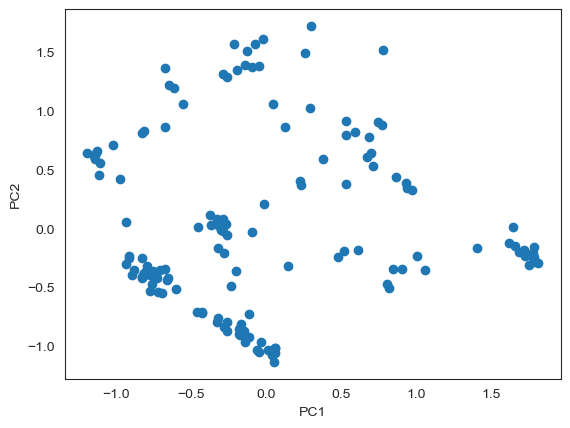

In [5]:
import glob
import numpy as np
flist = glob.glob("snippet/*.pdb")
if(len(flist)==0):
    print("# You need to run the example example8_snippet.ipynb")
    exit()
    
# calculate G-VECTORS  for all files
gvecs = []
for f in flist:
    gvec,seq = bb.dump_gvec(f)
    assert len(seq)==4
    gvecs.extend(gvec)

gvecs = np.array(gvecs)
gvecs = gvecs.reshape(149,-1)
print(gvecs.shape)

import barnaba.cluster as cc
# calculate PCA
v,w = cc.pca(gvecs,nevecs=3)
print("# Cumulative explained variance of component: 1=%5.1f 2:=%5.1f 3=%5.1f" % (v[0]*100,v[1]*100,v[2]*100))

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

plt.scatter(w[:,0],w[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")

In [6]:
new_labels, center_idx = cc.dbscan(gvecs,range(gvecs.shape[0]),eps=0.35,min_samples=8)

# eps:0.700 min_samples:8  nclusters: 4
#  silhouette score: 0.1728
# Avg silhouette: 0.6111 
# assigned samples :71 total samples:149 
#  N size       max eRMSD (IC)       med eRMSD (IC) max eRMSD (centroid) med eRMSD (centroid) center 
# 00 0026                0.613                0.309                0.440                0.222 00 118
# 01 0022                0.553                0.337                0.372                0.280 01 11
# 02 0015                0.543                0.286                0.370                0.229 02 4
# 03 0008                0.453                0.228                0.311                0.158 03 8


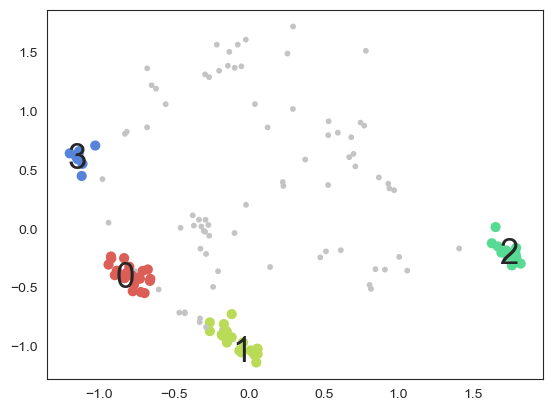

In [7]:
cp = sns.color_palette("hls",len(center_idx)+1)
colors = [cp[j-1] if(j!=0) else (0.77,0.77,0.77) for j in new_labels]
size = [40 if(j!=0) else 10 for j in new_labels]
#do scatterplot
plt.scatter(w[:,0],w[:,1],s=size,c=colors)
for i,k in enumerate(center_idx):
    plt.text(w[k,0],w[k,1],str(i),ha='center',va='center',fontsize=25)

In [8]:
import py3Dmol

cluster_0 = open(flist[center_idx[0]],'r').read()
cluster_1 = open(flist[center_idx[1]],'r').read()
cluster_2 = open(flist[center_idx[2]],'r').read()
cluster_3 = open(flist[center_idx[3]],'r').read()

p = py3Dmol.view(width=900,height=600,viewergrid=(2,2))
#p = py3Dmol.view(width=900,height=600)
#p.addModel(query_s,'pdb')
p.addModel(cluster_0,'pdb',viewer=(0,0))
p.addModel(cluster_1,'pdb',viewer=(0,1))
p.addModel(cluster_2,'pdb',viewer=(1,0))
p.addModel(cluster_3,'pdb',viewer=(1,1))


#p.addModel(hit_0,'pdb',viewer=(0,1))
p.setStyle({'stick':{}})
p.setBackgroundColor('0xeeeeee')
p.zoomTo()
p.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

# 7.Calculate elastic network models for nucleic acids and nucleic acids/protein complexes [2]

In [3]:
# barnaba ENM --pdb ../test/data/GNRA.pdb --shape
# import barnaba
import barnaba.enm as enm
# define the input file
fname = "GNRA.pdb"
%time enm_obj=enm.Enm(fname,sparse=False)

# Read  (18, 3) coordinates
CPU times: total: 62.5 ms
Wall time: 154 ms


Text(0.5, 0, '$i$')

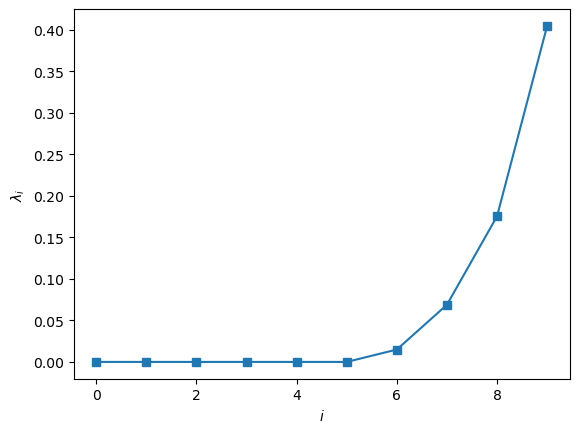

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.plot(enm_obj.get_eval()[:10],marker='s')
plt.ylabel(r'$\lambda_i$')
plt.xlabel('$i$')

# 8. Calculate backbone and pucker torsion angles in a PDB structure or trajectory

In [14]:
#Backbone torsion angles
traj = "UUCG.xtc"
top = "UUCG.pdb"
angles_b,res_b = bb.backbone_angles(traj,topology=top,\
                                     residues=["U_4_0","G_6_0"],angles=["chi"])
print(angles_s.shape)
# print angles
for j in range(angles_s.shape[1]):
    stri = "%10s" % res_b[j]
    for k in range(angles_s.shape[2]):
        stri += "%10.3f " % angles_s[0,j,k]
    print(stri)

# Loading UUCG.xtc 


(20001, 2, 1)
     U_4_0    -2.196 
     G_6_0    -2.582 


# Loading UUCG.xtc 


([], [])

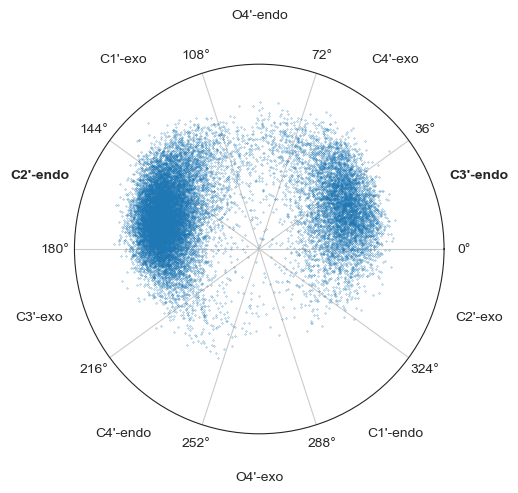

In [15]:
#Pucker torsion angles
angles_p,rr = bb.pucker_angles(traj,topology=top, residues=["C_5_0"])

ax = plt.subplot(111, polar=True)
c = plt.scatter(angles_p[:,0,0], angles_p[:,0,1],s=0.05)
p3 = np.pi/5
plt.ylim(0,1.2)
xt = np.arange(0,2*np.pi,p3)
plt.text(0.5*p3,1.5,"C3'-endo",ha='center',fontweight='bold')
plt.text(1.5*p3,1.5,"C4'-exo",ha='center')
plt.text(2.5*p3,1.5,"O4'-endo",ha='center')
plt.text(3.5*p3,1.5,"C1'-exo",ha='center')
plt.text(4.5*p3,1.5,"C2'-endo",ha='center',fontweight='bold')
plt.text(5.5*p3,1.5,"C3'-exo",ha='center')
plt.text(6.5*p3,1.5,"C4'-endo",ha='center')
plt.text(7.5*p3,1.5,"O4'-exo",ha='center')
plt.text(8.5*p3,1.5,"C1'-endo",ha='center')
plt.text(9.5*p3,1.5,"C2'-exo",ha='center')
plt.xticks(xt)
plt.yticks([])

# 9. Back-calculate 3J scalar couplings from PDB structure or trajectory

In [16]:
#barnaba JCOUPLING --pdb ../test/data/sample1.pdb
# define trajectory and topology files
traj = "samples.xtc"
top = "sample1.pdb"

couplings,rr = bb.jcouplings(traj,topology=top)
print(couplings.shape)

# Loading samples.xtc 


(101, 71, 12)


C:\Users\vulla\Documents\barnaba\barnaba_research\barnaba\functions.py:566: RuntimeWarning: invalid value encountered in multiply
  jcouplings = np.empty((traj.n_frames,all_idx.shape[0],len(couplings)))*np.nan


(101, 1, 7)


# Loading samples.xtc 


Text(0.5, 0, "H1'-C1'-C2'-H2' angle, residue RC5_1_0 (rad)")

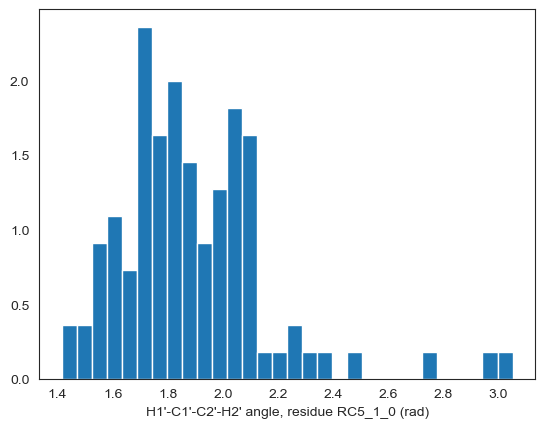

In [17]:
angles,rr = bb.jcouplings(traj,topology=top,residues=["RC5_1_0"],raw=True)
print(angles.shape)

plt.hist(angles[:,0,0],bins=30,density=True)
plt.xlabel("H1'-C1'-C2'-H2' angle, residue %s (rad)" % rr[0])

# 10. Score three-dimensional structures using eSCORE [1]

In [5]:
#barnaba ESCORE --ff ../test/data/1S72.pdb --pdb ../test/data/sample1.pdb
from barnaba import escore
pdb = "1S72.pdb"
Escore = escore.Escore([pdb])

# KDE computed. Bandwidth=  0.25  using 10655 base-pairs

In [10]:
traj = "UUCG.xtc"
top = "UUCG.pdb"
native="UUCG.native.pdb"
import mdtraj as md
import barnaba as bb

# load trajectory
tt = md.load(traj,top=top)
# save low ermsd 
tt[3849].save("best_score_0.pdb")
tt[18536].save("best_score_1.pdb")

# align to native and write aligned PDB to disk
rmsd1 = bb.rmsd(native,'best_score_0.pdb',out='best_score_0a.pdb')
rmsd2 = bb.rmsd(native,'best_score_1.pdb',out='best_score_1a.pdb')
rmsd1, rmsd2

# found  93 atoms in common
# found  93 atoms in common


(array([0.20950496], dtype=float32), array([0.09081315], dtype=float32))

In [11]:
import py3Dmol

pdb_e = open('best_score_0a.pdb','r').read()
pdb_n = open('best_score_1a.pdb','r').read()

p = py3Dmol.view(width=900,height=600,viewergrid=(1,2))
p.addModel(pdb_n,'pdb',viewer=(0,0))
p.addModel(pdb_e,'pdb',viewer=(0,1))

p.setStyle({'stick':{}})
p.setBackgroundColor('0xeeeeee')
p.zoomTo()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.